In [39]:
import sys, os, glob, random, copy, time, shutil, re
# random.seed(666)
from collections import Counter
import numpy as np
from collections import Counter
from itertools import cycle
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import jellyfish
try:
    def hamming_distance(s1, s2):
        if s1 == s2:
            return 0
        else:
            return jellyfish.hamming_distance(s1, s2)
    assert(hamming_distance('ABC', 'ABCD') == 1)
except:
    def hamming_distance(s1, s2):
        if s1 == s2:
            return 0
        else:
            return jellyfish.hamming_distance(unicode(s1), unicode(s2))
    assert(hamming_distance('ABC', 'ABCD') == 1)

In [5]:
f = 'SnakeVenom200_aammp_profiles.txt'
table = [l.strip().split(',') for l in open(f)]

In [6]:
headers = table.pop(0)
df = pd.DataFrame(table, columns=headers)
# pd.DataFrame.to_pickle('{}_pickle'.format(outfile_p))

In [7]:
df

,clusterID,naiveAA,vdj_len,naive,Nseqs,CDR3_start,CDR3_end,v_grp,d_grp,j_grp,...,j_gene,sample,locus,filename,input_seqs,input_seqsAA,Nmuts,abundance,UID,isotype
0,0,QAVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLF...,109,CAGGCTGTTGTGACTCAGGAATCTGCACTCACCACATCACCTGGTG...,11005,278,311,IGLV1,IGLDx-x*x,IGLJ1,...,IGLJ1*01,PLA2-1,IgL,PLA2-1_reheader_IgL_split_1_partitions-cluster...,NNNNNNNNNNNCAGGCTGTTGTGACTCAGGAATCTGCACTCACCAC...,QAVVTQESALTTSPGATVTLTCRSSAGAVTTTNNANWVQEKPDHLF...,9:9:14:2:16:2:3:7:2:5:23:1:10:2:16:5:12:4:22:3...,1:1:1:1:1:1:1:7:1:1:1:7:1:1:1:1:1:1:1:1:1:10:1...,AAAAAAAAACGAGGAGG:AAAAAAGATATAAATGG:AAAAGATATG...,IgL:IgL:IgL:IgL:IgL:IgL:IgL:IgL@IgL@IgL@IgL@Ig...
1,1,QAVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLF...,109,CAGGCTGTTGTGACTCAGGAATCTGCACTCACCACATCACCTGGTG...,9463,278,311,IGLV1,IGLDx-x*x,IGLJ1,...,IGLJ1*01,PLA2-2,IgL,PLA2-2_reheader_IgL_split_1_partitions-cluster...,NNNNNNNNNNNCAGGCTGTTGTGACTCAGGAATCTGCACTCCCCAC...,QAVVTQESALPTSPGETVTLTCRSSTGAVTSSNYANWVQEKPDHLF...,4:5:2:3:15:10:3:2:9:3:3:3:5:21:2:22:4:4:12:4:5...,1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:...,AAAAAAAAATATGAGCG:AAAATAATAATTAATTC:AAAATATAGC...,IgL:IgL:IgL:IgL:IgL:IgL:IgL:IgL:IgL:IgL:IgL:Ig...
2,2,QAVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLF...,109,CAGGCTGTTGTGACTCAGGAATCTGCACTCACCACATCACCTGGTG...,9238,278,311,IGLV1,IGLDx-x*x,IGLJ1,...,IGLJ1*01,3FTx-3,IgL,3FTx-3_reheader_IgL_split_1_partitions-cluster...,NNNNNNNNNNNCAGGCTGTTGTGACTCAGGAATGTGCACTCACCAC...,QAVVTQECALTTSSAETVPLTCRSSTGAVTIMTNSYWVQEKPDHLF...,15:4:1:3:10:1:2:8:2:2:2:8:11:9:3:3:24:5:119:9:...,1:1:1:1:1:25:1:1:1:16:1:1:1:4:1:1:1:1:1:1:1:1:...,AAAAAAAAATAACACCA:AAAAATTCCTTTTTTTA:AAAATAAGTT...,IgL:IgL:IgL:IgL:IgL:IgL@IgL@IgL@IgL@IgL@IgL@Ig...
3,3,QAVVTQESALTTSPGGTVILTCRSSTGAVTTSNYANWVQEKPDHLF...,109,CAGGCTGTTGTGACTCAGGAATCTGCACTCACCACATCACCTGGTG...,9023,278,311,IGLV2,IGLDx-x*x,IGLJ2,...,IGLJ2*01,PLA2-1,IgL,PLA2-1_reheader_IgL_split_1_partitions-cluster...,NNNNNNNNNNNCAGGCTGTTGTGACTCAGGAATCTGCACTCACCAC...,QAVVTQESALTTSPGGTVILTCRPSTGAVTTSNYANWVQEKPDHLF...,2:2:4:7:5:2:10:3:4:5:3:8:12:15:7:8:2:4:9:2:11:...,1:1:1:1:1:1:1:1:13:1:1:1:1:1:1:1:1:1:1:1:1:1:1...,AAAAAAAACAACGATTT:AAAAATCACTTTCCTAT:AAAACTAGTT...,IgL:IgL:IgL:IgL:IgL:IgL:IgL:IgL:IgL@IgL@IgL@Ig...
4,4,QAVVTQESALTTSPGGTVILTCRSSTGAVTTSNYANWVQEKPDHLF...,109,CAGGCTGTTGTGACTCAGGAATCTGCACTCACCACATCACCTGGTG...,8733,278,311,IGLV2,IGLDx-x*x,IGLJ2,...,IGLJ2*01,PLA2-2,IgL,PLA2-2_reheader_IgL_split_1_partitions-cluster...,NNNNNNNNNNNCAGGCTGTTGTGACTCAGCAATCTTCCCTCCCCAC...,QAVVTQQSSLPTFPGGITIPNSRPSTAAVTTCNYSNWFKEKPDHLF...,23:22:4:7:7:2:10:6:2:9:7:2:12:2:2:5:3:3:6:32:6...,1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:4:4:...,AAAAAAAAGCCAAATCT:AAAACAGAGTAAAAATT:AAAAGTTGTA...,IgL:IgL:IgL:IgL:IgL:IgL:IgL:IgL:IgL:IgL:IgL:Ig...
5,5,QAVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLF...,109,CAGGCTGTTGTGACTCAGGAATCTGCACTCACCACATCACCTGGTG...,6179,278,311,IGLV1,IGLDx-x*x,IGLJ1,...,IGLJ1*01,3FTx-1,IgL,3FTx-1_reheader_IgL_split_1_partitions-cluster...,NNNNNNNNNNNCAGGCTGTTGTGACTCAGGAATCTGCACTCACCAC...,QAVVTQESALTTSPGETVTLTCRSSIWAVTTSNDANWVQEKPDHLF...,7:5:2:4:12:5:5:1:2:3:2:3:4:4:4:8:3:6:5:3:5:12:...,1:1:1:1:1:1:1:4:1:1:1:1:1:1:1:1:1:1:1:1:1:1:58...,AAAAGACTTACACTTAA:AAAATACATCAAATCTT:AAAATACGGC...,IgL:IgL:IgL:IgL:IgL:IgL:IgL:IgL@IgL@IgL@IgL:Ig...
6,6,QAVVTQESALTTSPGGTVILTCRSSTGAVTTSNYANWVQEKPDHLF...,109,CAGGCTGTTGTGACTCAGGAATCTGCACTCACCACATCACCTGGTG...,5987,278,311,IGLV2,IGLDx-x*x,IGLJ2,...,IGLJ2*01,3FTx-1,IgL,3FTx-1_reheader_IgL_split_1_partitions-cluster...,NNNNNNNNNNNCAGGCTGTTGTGACCCAGGAATCTGCACTCACCAC...,QAVVTQESALTTSPGGTGILTCRSSTGAVTTSNYVNWVQEKPDHLF...,4:4:10:2:5:5:5:6:5:7:8:3:5:3:6:10:3:4:6:2:4:4:...,1:1:1:4:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:1:...,AAAAAAAAAGCATGGAA:AAAAAAGGACCTACGGG:AACCGTTCGA...,IgL:IgL:IgL:IgL@IgL@IgL@IgL:IgL:IgL:IgL:IgL:Ig...
7,7,QAVVTQESALTTSPGGTVILTCRSSTGAVTTSNYANWVQEKPDHLF...,109,CAGGCTGTTGTGACTCAGGAATCTGCACTCACCACATCACCTGGTG...,5870,278,311,IGLV2,IGLDx-x*x,IGLJ2,...,IGLJ2*01,3FTx-3,IgL,3FTx-3_reheader_IgL_split_1_partitions-cluster...,N

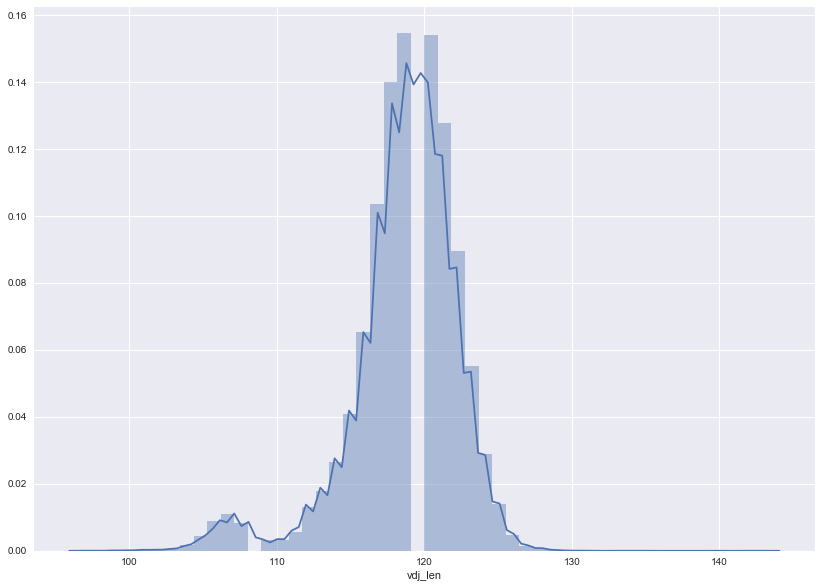

In [120]:
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(14,10))
# ax = sns.distplot(list(map(int, df['vdj_len'])))
ax = sns.distplot(pd.to_numeric(df['vdj_len']))

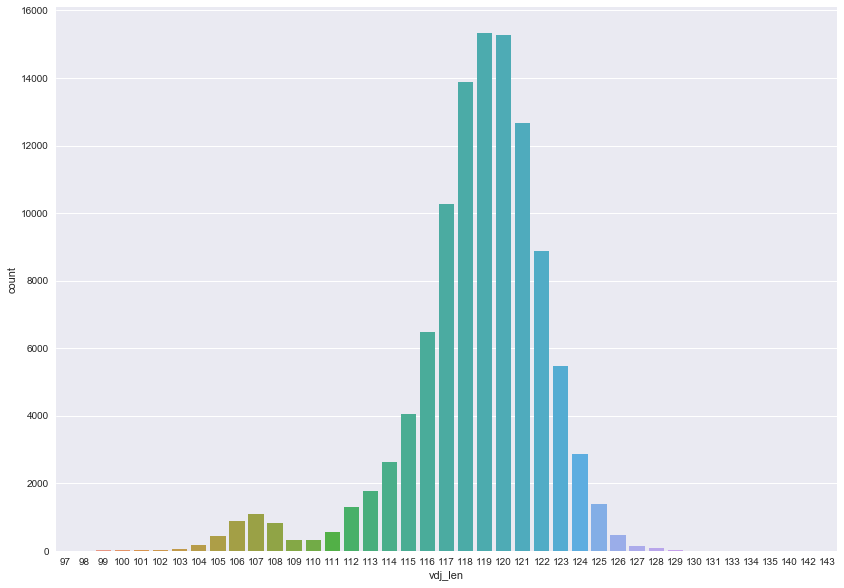

In [116]:
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(14,10))
ax = sns.countplot(df['vdj_len'],
                   order=list(map(str, sorted(list(map(int, set(df['vdj_len'])))))))

In [131]:
CDR3_len = (pd.to_numeric(df['CDR3_end']) - pd.to_numeric(df['CDR3_start']))/3
CDR3_len = list(map(int, CDR3_len))

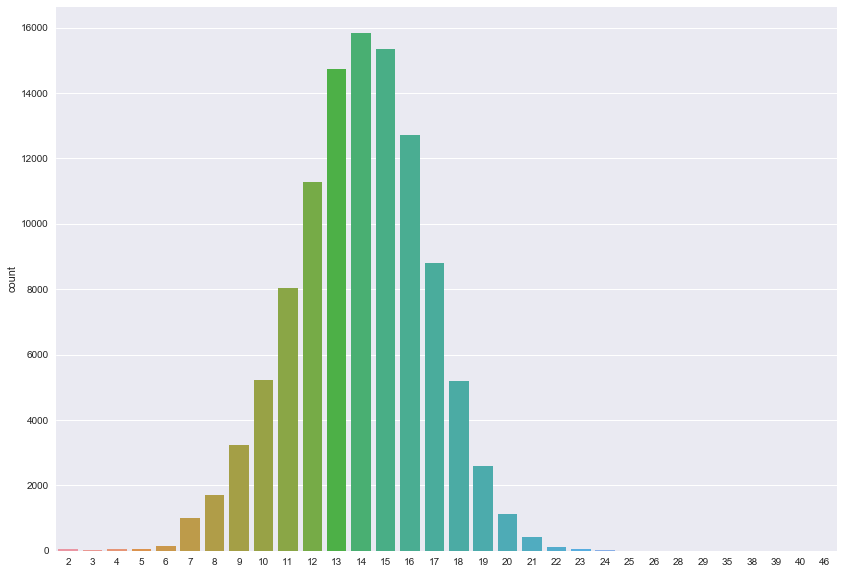

In [132]:
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(14,10))
ax = sns.countplot(list(map(str, CDR3_len)),
                   order=list(map(str, sorted(list(set(CDR3_len))))))

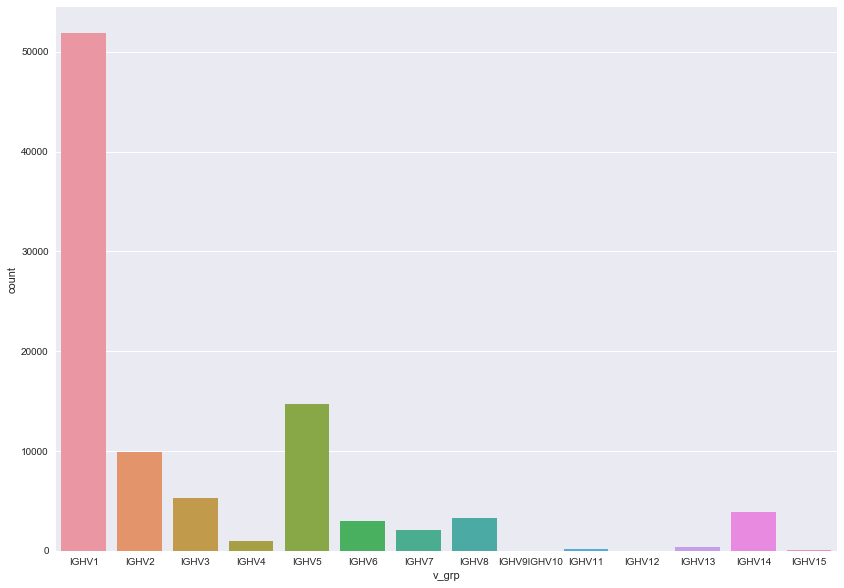

In [144]:
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(14,10))
ax = sns.countplot(df['v_grp'], order=[
 'IGHV1',
 'IGHV2',
 'IGHV3',
 'IGHV4',
 'IGHV5',
 'IGHV6',
 'IGHV7',
 'IGHV8',
 'IGHV9'
 'IGHV10',
 'IGHV11',
 'IGHV12',
 'IGHV13',
 'IGHV14',
 'IGHV15',
])

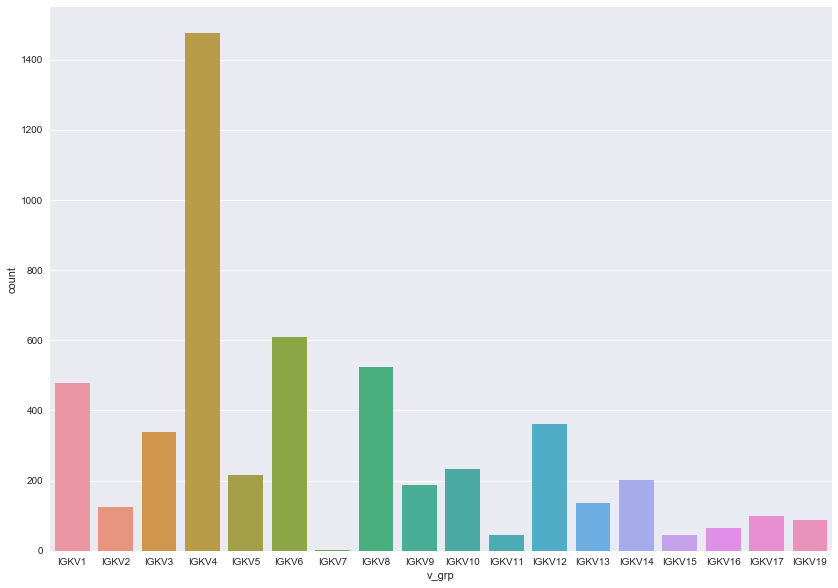

In [145]:
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(14,10))
ax = sns.countplot(df['v_grp'], order=[
 'IGKV1',
 'IGKV2',
 'IGKV3',
 'IGKV4',
 'IGKV5',
 'IGKV6',
 'IGKV7',
 'IGKV8',
 'IGKV9',
 'IGKV10',
 'IGKV11',
 'IGKV12',
 'IGKV13',
 'IGKV14',
 'IGKV15',
 'IGKV16',
 'IGKV17',
 'IGKV19'
])

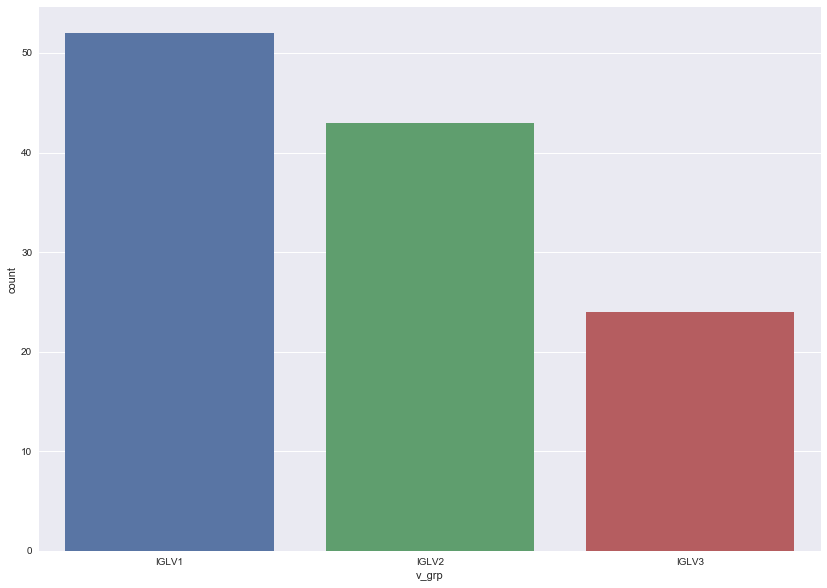

In [146]:
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(14,10))
ax = sns.countplot(df['v_grp'], order=[
 'IGLV1',
 'IGLV2',
 'IGLV3'
])

In [25]:
abu = [int(a) for e in df['abundance'] for a in e.split(':')]
len(abu)

1461442

In [26]:
mut = [int(m) for e in df['Nmuts'] for m in e.split(':')]
len(mut)

1461442

In [21]:
iso = [i for e in df['isotype'] for i in e.split(':')]
len(iso)

1461442

In [81]:
ai = [[a, Counter(i.split('@')).most_common()[0][0]] for a, i in zip(abu, iso)]
mi = [[m, Counter(i.split('@')).most_common()[0][0]] for m, i in zip(mut, iso)]
#mi = [[m, i] for m, i in zip(mut, iso) if '@' not in i]

In [41]:
len(ai)
ai[0:10]

[[1, 'IgL'],
 [1, 'IgL'],
 [1, 'IgL'],
 [1, 'IgL'],
 [1, 'IgL'],
 [1, 'IgL'],
 [1, 'IgL'],
 [7, 'IgL'],
 [1, 'IgL'],
 [1, 'IgL']]

In [87]:
mi_df = pd.DataFrame(data=mi, columns=['Nmuts', 'Isotype'])
mi_df = mi_df[mi_df['Nmuts'] < 50]

In [88]:
#mi_df

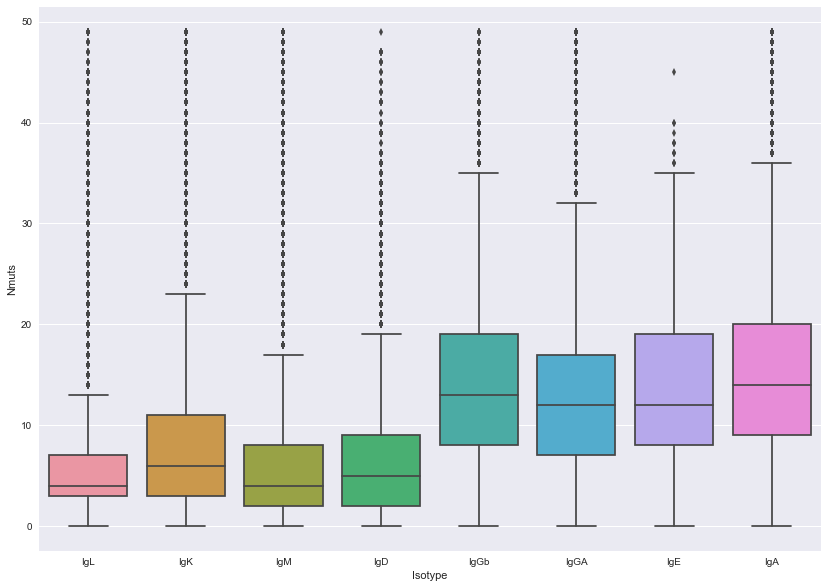

In [89]:
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(14,10))
ax = sns.boxplot(x="Isotype", y="Nmuts", data=mi_df,
                 order=['IgL', 'IgK', 'IgM', 'IgD', 'IgGb', 'IgGA', 'IgE', 'IgA'])

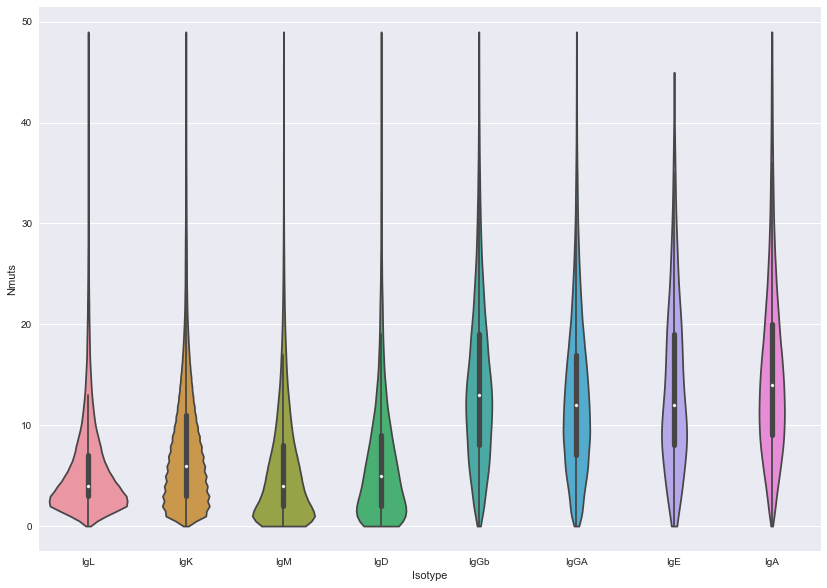

In [92]:
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(14,10))
ax = sns.violinplot(x="Isotype", y="Nmuts", data=mi_df,
                    order=['IgL', 'IgK', 'IgM', 'IgD', 'IgGb', 'IgGA', 'IgE', 'IgA'],
                    cut=0)#, scale="width")

In [79]:
ai_df = pd.DataFrame(data=ai, columns=['Abundance', 'Isotype'])

In [80]:
ai_df.groupby('Isotype')['Abundance'].mean()

Isotype
IgA     1.239702
IgD     1.002994
IgE     1.184179
IgGA    1.953846
IgGb    1.200137
IgK     4.055294
IgL     3.965977
IgM     1.525948
Name: Abundance, dtype: float64

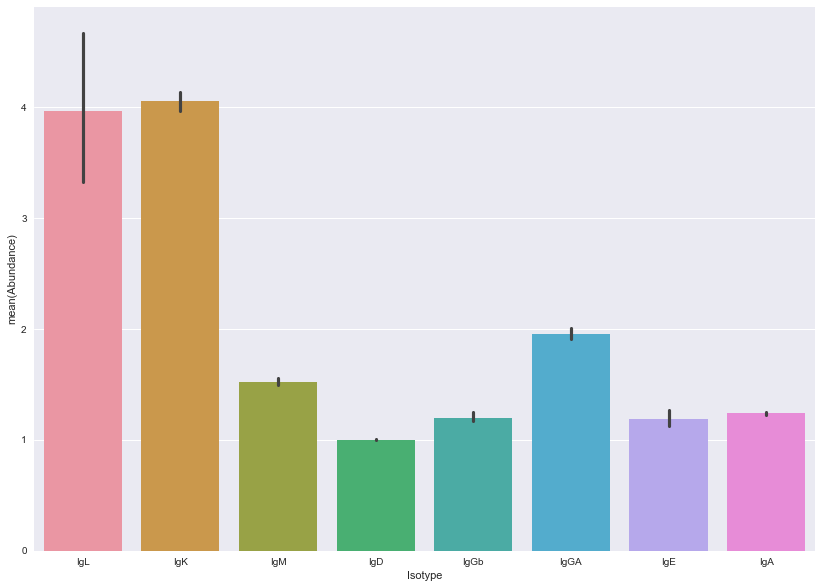

In [107]:
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(14,10))
ax = sns.barplot(x="Isotype", y="Abundance", data=ai_df,
                 order=['IgL', 'IgK', 'IgM', 'IgD', 'IgGb', 'IgGA', 'IgE', 'IgA'])

In [86]:
ai_df.groupby('Isotype')['Abundance'].sum()

Isotype
IgA      397430
IgD       13063
IgE        1003
IgGA     246380
IgGb      21012
IgK     3017358
IgL      344810
IgM      232527
Name: Abundance, dtype: int64

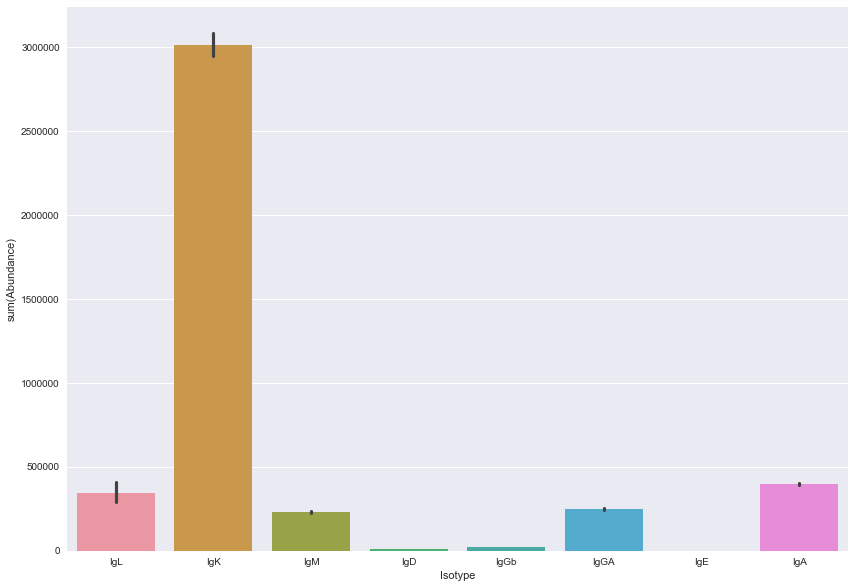

In [108]:
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(14,10))
ax = sns.barplot(x="Isotype", y="Abundance", data=ai_df,
                 order=['IgL', 'IgK', 'IgM', 'IgD', 'IgGb', 'IgGA', 'IgE', 'IgA'],
                 estimator=np.sum)

In [ ]:
ai_df.Abundance

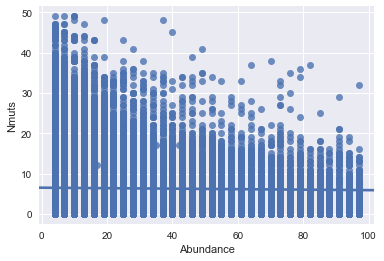

In [164]:
mask = (ai_df.Abundance > 1) & (ai_df.Abundance < 100) & (mi_df.Nmuts < 50)
# ax = sns.regplot(x=ai_df.Abundance[ai_df.Abundance > 1], y=mi_df.Nmuts[ai_df.Abundance > 1])
ax = sns.regplot(x=ai_df.Abundance[mask], y=mi_df.Nmuts[mask])